In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.inspection import permutation_importance
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

from utils import generate_orf_id, load_features, Dataset
from modeling_utils import plot_roc_pr
from pathlib import Path

pd.set_option('display.max_columns', 100)

warnings.filterwarnings('ignore')

/home/ec2-user/miniconda3/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data_dir = Path('data').absolute()

In [3]:
dataset_names = []
for feature_file in data_dir.glob('*orf_features.csv'):
    dataset_names.append(feature_file.name)

In [4]:
overwrite = False
feature_file = data_dir.joinpath('orf_features_all.csv')

if not feature_file.exists() or overwrite:
    feature_df = load_features(data_dir, dataset_names)
    
    feature_df.to_csv(feature_file)

In [7]:
with open('data/top_model_all_gb.pkl', 'rb') as file:
    ds = pickle.load(file)

In [8]:
ds.model = ds.model.fit(ds.X, ds.y)

In [13]:
ds.X

,orf_start,orf_end,mean,sum,std,n_reads_orf_vs_transcript,pos_1_vs_0,pos_2_vs_0,frames_1_vs_0,frames_2_vs_0,five_utr_vs_cds_mean,five_utr_vs_cds_max,five_utr_vs_start_codon_mean,five_utr_vs_start_codon_max,cds_utr_vs_start_codon_mean,cds_utr_vs_start_codon_max,three_utr_vs_cds_mean,three_utr_vs_cds_max,three_utr_vs_stop_codon_mean,three_utr_vs_stop_codon_max,cds_utr_vs_stop_codon_mean,cds_utr_vs_stop_codon_max,dist_neg_100,dist_neg_150,dist_pos_100,dist_pos_150,price,ribotish,ribocode
0,119298778.0,119300535.0,0.084024,16.888864,0.174745,1.000000,9.000000,7.666667,0.118863,0.284981,0.471676,0.445487,0.197328,-0.397920,-0.306780,-0.843407,1.101565,0.781995,1.669626,0.739318,0.642049,0.152634,24.000000,36.000000,7.000000,10.000000,333.00000,0.000000,13.229984
1,164877331.0,164879008.0,0.072125,11.900549,0.114989,0.995578,0.000000,0.287698,0.156514,0.441996,0.366351,0.196041,0.406677,-0.231474,0.050369,-0.427516,3.000000,3.000000,3.000000,3.000000,-0.026329,-0.347829,27.000000,38.000000,10.666667,12.000000,666.00000,0.000000,10.281421
2,211391639.0,211426222.0,0.002172,0.618964,0.011806,0.271739,10.000000,10.000000,0.600000,0.066667,0.111436,0.000000,0.433656,-0.397940,0.410174,-0.397940,-0.801632,-0.477121,0.176091,-0.477121,1.255273,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,2.330887
3,103951522.0,103956738.0,0.019943,4.307726,0.046973,0.867896,10.000000,10.000000,0.148938,0.397701,0.956947,0.452327,1.059631,0.298750,0.132361,-0.153577,0.659143,0.440740,-1.877341,-2.100343,-2.053234,-2.200687,20.666667,20.666667,8.333333,87.000000,337.95061,0.000000,7.009958
4,117839801.0,117842776.0,0.021059,6.064981,0.054491,1.000000,10.000000,10.000000,0.150283,0.249963,2.377542,2.232990,2.515866,2.232990,0.651793,0.349797,0.777362,0.463055,1.332207,0.281699,0.646401,-0.100343,60.000000,60.000000,287.000000,287.000000,670.91850,13.844369,9.231052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4320,29574701.0,29575099.0,0.006398,1.497130,0.023246,0.998609,10.000000,10.000000,0.063286,0.122910,-0.224263,-0.085210,-0.263075,-0.555450,0.090217,-0.308329,2.936162,2.920069,-2.600000,-2.600000,-2.786328,-2.847712,13.400000,22.566667,13.333333,41.466667,0.00000,0.000000,6.864412
4321,23346647.0,23347562.0,0.006785,3.053272,0.022312,0.982952,10.000000,10.000000,0.067736,0.127614,0.151145,0.136862,-1.129141,-1.288964,-1.264273,-1.417660,2.852135,2.810034,-2.200000,-2.200000,-2.489969,-2.615904,2.966667,5.600000,1.400000,2.133333,0.00000,0.000000,12.501521
4322,18444751.0,18444826.0,0.006380,0.478524,0.021891,1.000000,10.000000,10.000000,0.000000,0.000000,1.410223,1.274636,1.549674,1.141990,0.159040,-0.132647,3.000000,3.000000,-3.000000,-3.000000,-3.000000,-3.000000,39.333333,40.333333,35.000000,35.000000,1.72455,0.000000,1.341375
4323,50876500.0,50876608.0,0.016384,1.769489,0.043546,1.000000,0.000000,0.083333,0.057347,0.267889,0.711144,0.426472,0.566768,-0.173963,-0.154746,-0.600435,2.057904,1.778088,-1.796777,-1.985665,-2.254807,-2.422787,6.047619,13.047619,6.666667,20.619048,0.00000,0.000000,4.688288


In [15]:
#predictions = ds.model.predict(feature_df)

In [30]:
prediction_proba = ds.model.predict_proba(feature_df)

In [11]:
feature_df['prediction'] = predictions

In [16]:
sum(predictions)

3913

In [18]:
feature_df[feature_df['prediction'] == 1].to_csv('data/top_orfs_gb_240312.csv')

In [ ]:
feat

In [21]:
sum(ds.model.predict(feature_df))

5901

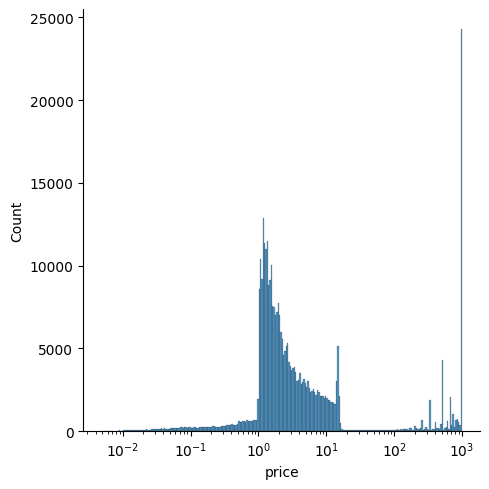

In [24]:
sns.displot(feature_df['price'], log_scale=True)

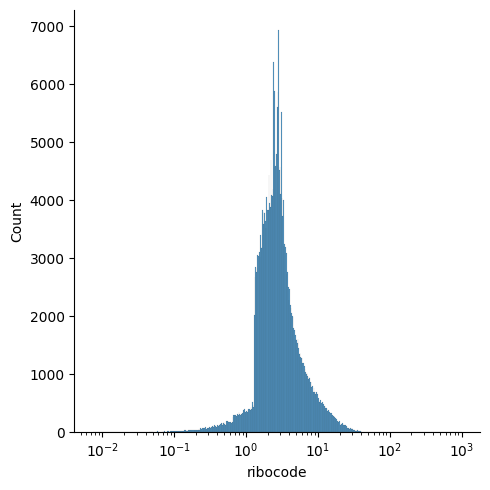

In [25]:
sns.displot(feature_df['ribocode'], log_scale=True)

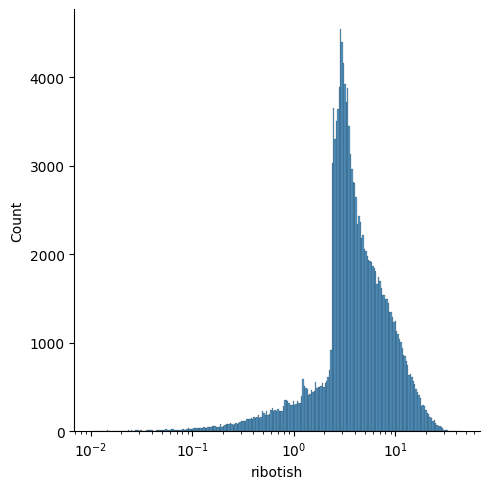

In [26]:
sns.displot(feature_df['ribotish'], log_scale=True)

In [28]:
len(set(feature_df.index))

687671

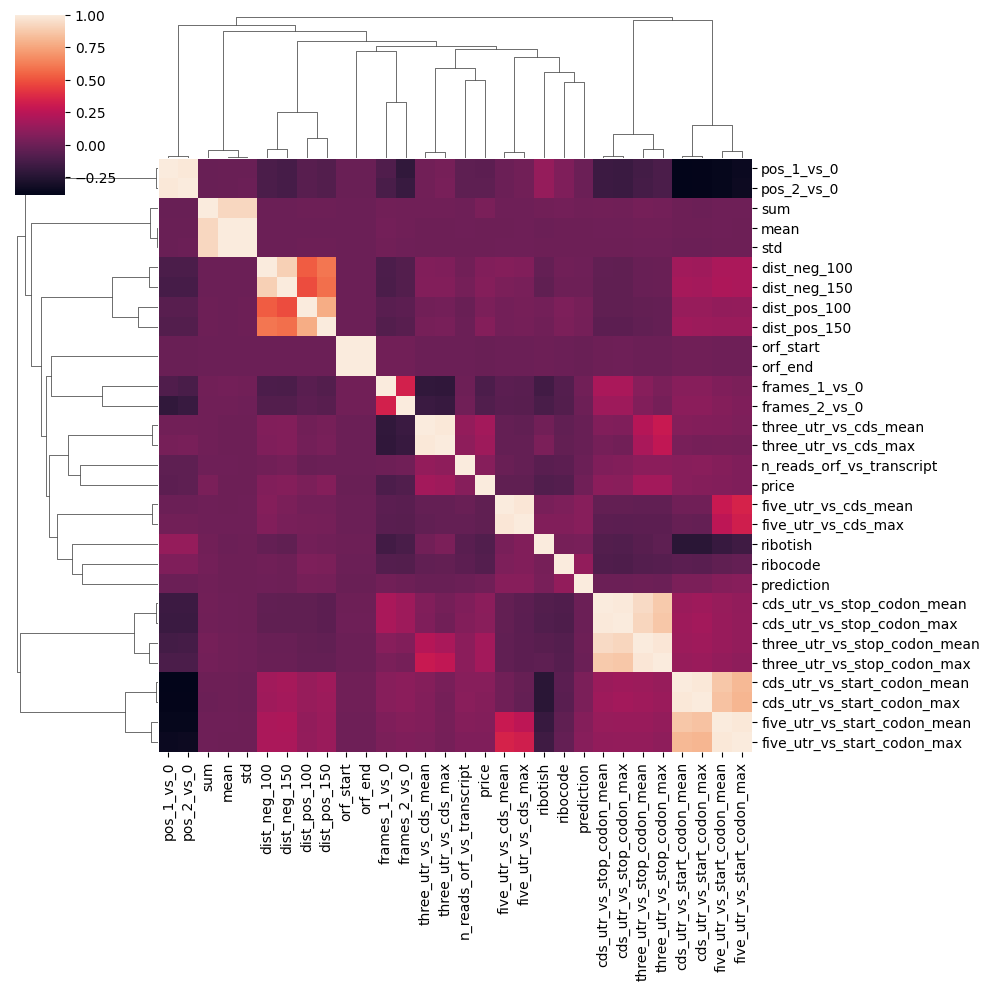

In [21]:
sns.clustermap(feature_df.corr())